In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [ ]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

In [ ]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [ ]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [ ]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [ ]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [ ]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [ ]:
test = pd.read_csv('test.csv')
test


In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

In [ ]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

In [ ]:
# Amanda's tulle tralle, for en evig gralle skretralle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate
import seaborn as sns


# Output df is the train_*
# train_a and obs_a are different lengths

In [ ]:
# sjekk om framesene har dobbelt time stamp i seg
# train_a['time'].unique()
# X_train_observed_a['date_forecast'].unique()
print('If True all time stamps are unique')
print(len(train_a)==len(train_a['time'].unique()))
print(len(X_train_observed_a)==len(X_train_observed_a['date_forecast'].unique()))

In [ ]:
def data_length(train_a, X_train_observed_a):
    # kutt slik at de er like, sortert etter dato
    observed_feature_test = X_train_observed_a[X_train_observed_a['date_forecast'].isin(train_a['time'])].sort_values(by=['date_forecast']) # sortert etter datao
    # Hvis det var kun deenne -- kontroler at den andre også har lik sortering aka etter tid # train_a = train_a.sort_values(by=['time'])
    train_feature_test = train_a[train_a['time'].isin(X_train_observed_a['date_forecast'])].sort_values(by=['time']) # sortert etter datao

    print('If True same length and time stamps')
    print(len(observed_feature_test) == len(train_feature_test))
    print(len(observed_feature_test), len(train_feature_test))

    return observed_feature_test, train_feature_test

In [ ]:
# The feature I'm testing
features_list = [
    'relative_humidity_1000hPa:p',
    'sfc_pressure:hPa',
    'snow_density:kgm3',
    'snow_depth:cm',
    'snow_drift:idx',
    'snow_melt_10min:mm',
    'snow_water:kgm2',
    'sun_azimuth:d',
    'sun_elevation:d',
    'super_cooled_liquid_water:kgm2',
    't_1000hPa:K',
    'total_cloud_cover:p',
    'visibility:m',
    'wind_speed_10m:ms',
    'wind_speed_u_10m:ms',
    'wind_speed_v_10m:ms',
    'wind_speed_w_1000hPa:ms'
]

In [ ]:
# Plot over time
# Plot train_a = train target -- pv - power messurment ? 
def plot_all_feature(train, obs, features_list):
    plt.figure(figsize=(20, 4))
    plt.plot(train['time'], train['pv_measurement'], label='train_a')

    # Plott alle featurene over tid
    for feature in features_list:
        plt.figure(figsize=(20, 4))
        plt.plot(obs['date_forecast'], obs[feature])
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'Plot of {feature} over time')
        plt.show()


In [ ]:

def correlation_calc(train: pd.DataFrame, obs: pd.DataFrame, features_list: list[str]) -> tuple[dict, list]:
    """ Takes in two dataFrames and calculates the correlation between the two. """
    correlations = {}

    for feature in features_list:
        covariance = obs[feature].corr(train['pv_measurement'])
        correlations[feature] = covariance

    # List containing the feature and correlation value.
    corr_data = []
    for feature, corl in correlations.items():
        corr_data.append([feature, corl])

    # Display the correlation values in a neat list. NOTE: I have never used this, but a pretty cool way to display data.
    print('This is the correlation between each feature and the output variable: \n')
    table = tabulate(corr_data, headers=['Feature', 'Correlation'], tablefmt='pretty')
    print(table)

    return correlations, corr_data


In [ ]:
def see_corre(correlations: dict[str, float]):
    """ Takes in a dictionary of correlation values, and plots them in a horizontal bar plot."""
    correlation_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation']) # Create df to store the correlations
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False) # Sort the DataFrame by correlation values

    # Create a bar plot to visualize the correlations
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Correlation', y='Feature', data=correlation_df, orient='h', palette='viridis')
    plt.title('Correlation between pv_measurement and Features in obs')
    plt.xlabel('Correlation')
    plt.ylabel('Feature')
    plt.show()



In [ ]:
obs, train = data_length(train_a, X_train_observed_a)
correlations, corr_data = correlation_calc(train, obs, features_list)
see_corre(correlations)
plot_all_feature(train, obs, features_list)
# For A: observerer her at det ikke er snø når vi skal estimere

In [ ]:
# For B
obs, train = data_length(train_b, X_train_observed_b)
correlations, corr_data = correlation_calc(train, obs, features_list)
see_corre(correlations)
plot_all_feature(train, obs, features_list)


train_b = train_b.dropna() # Target data  NaN fjern 

observed_feature_test = X_train_observed_b[X_train_observed_b['date_forecast'].isin(train_b['time'])].sort_values(by=['date_forecast']) # sortert etter datao
# Hvis det var kun deenne -- kontroler at den andre også har lik sortering aka etter tid # train_a = train_a.sort_values(by=['time'])
train_feature_test = train_b[train_b['time'].isin(X_train_observed_b['date_forecast'])].sort_values(by=['time']) # sortert etter datao

print('If True same length and time stamps')
print(len(observed_feature_test) == len(train_feature_test))
print(len(observed_feature_test), len(train_feature_test))

# feature impotance -- random forest

In [ ]:
# For C
obs, train = data_length(train_c, X_train_observed_c)
correlations, corr_data = correlation_calc(train, obs, features_list)
see_corre(correlations)
plot_all_feature(train, obs, features_list)
# For A: observerer her at det ikke er snø når vi skal estimere

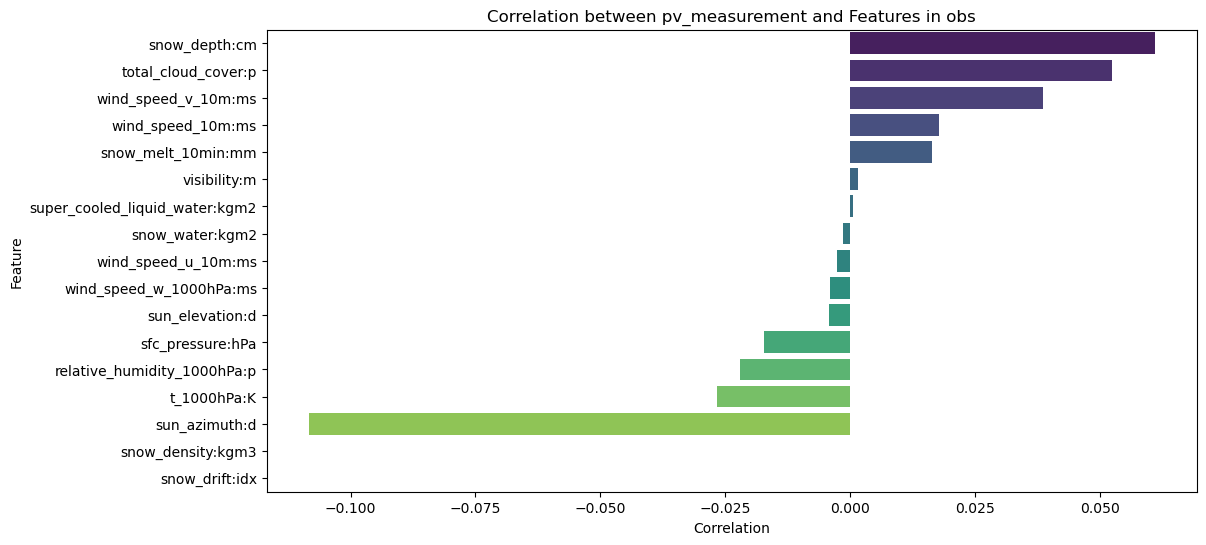

## Try Model for feature selection

In [448]:
import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

ImportError: cannot import name 'RandomForestClassfier' from 'sklearn.ensemble' (c:\Users\amand\anaconda3\envs\TDT4173\Lib\site-packages\sklearn\ensemble\__init__.py)

## Gammel code

In [341]:
# print(f'start : ', train_a['time'].head(1))
# print(f'end   : ', train_a['time'].tail(1))

# print(f'start : ', X_train_observed_a['date_forecast'].head(1))
# print(f'end   : ', X_train_observed_a['date_forecast'].tail(1))

# print(f'start : ', X_train_estimated_a['date_forecast'].head(1))
# print(f'end   : ', X_train_estimated_a['date_forecast'].tail(1))

In [342]:
# # Find the common time range
# common_start_time = max(train_a['time'].min(), X_train_observed_a['date_forecast'].min())
# common_end_time = min(train_a['time'].max(), X_train_observed_a['date_forecast'].max())

# # Filter 'train_a' to the common time range
# train_a_filtered = train_a[(train_a['time'] >= common_start_time) & (train_a['time'] <= common_end_time)]

# # Filter 'X_train_observed_a' to the common time range
# X_train_observed_a_filtered = X_train_observed_a[(X_train_observed_a['date_forecast'] >= common_start_time) & (X_train_observed_a['date_forecast'] <= common_end_time)]
# # 
# # Now, both data frames have the same time range
# # You can further process or analyze them as needed
# print(len(train_a_filtered), len(X_train_observed_a_filtered))

29667 118669


In [351]:
# plt.figure(figsize=(20, 4))
# plt.plot(train_a_filtered['time'], train_a_filtered['pv_measurement'], label='train_a')

# # Plott alle featurene over tid
# for feature in features_list:
#     plt.figure(figsize=(20, 4))
#     plt.plot(X_train_observed_a_filtered['date_forecast'], X_train_observed_a_filtered[feature])
#     plt.xlabel('Date')
#     plt.ylabel(feature)
#     plt.title(f'Plot of {feature} over time')
#     plt.show()


In [344]:
# # Beregn kovarians for hver funksjon med utgangsvariabelen
# covariances = {}
# for feature in features_list:
#     covariance = X_train_observed_a[feature].cov(train_a['pv_measurement'])
#     covariances[feature] = covariance

# # Skriv ut kovariansverdiene
# for feature, covariance in covariances.items():
#     print(f'Kovarians mellom {feature} og output_variable:                    {covariance}\n')

In [345]:
# train = train_a_filtered
# obs  = X_train_observed_a_filtered
# # Beregn kovarians for hver funksjon med utgangsvariabelen
# covariances = {}

# covariance = train['pv_measurement'].cov(train['pv_measurement'])
# covariances['self -- pv_measurement'] = covariance

# for feature in features_list:
#     covariance = obs[feature].cov(train['pv_measurement'])
#     covariances[feature] = covariance

# # Opprett en liste med kovariansverdiene
# covariance_data = []
# for feature, covariance in covariances.items():
#     covariance_data.append([feature, covariance])

# # Skriv ut kovariansverdiene i en fin tabell
# print('This is the covariance between each feature and the output variable: \ncovariance measures the degree of co-variation and can have a wide range of values \n')
# table = tabulate(covariance_data, headers=['Feature', 'Covariance'], tablefmt='pretty')
# print(table)

This is the covariance between each feature and the output variable: 
covariance measures the degree of co-variation and can have a wide range of values 

+--------------------------------+-----------------------+
|            Feature             |      Covariance       |
+--------------------------------+-----------------------+
|     self -- pv_measurement     |  1429296.1042811184   |
|  relative_humidity_1000hPa:p   |  -302.6372731095812   |
|        sfc_pressure:hPa        |  -227.53985399154357  |
|       snow_density:kgm3        |          0.0          |
|         snow_depth:cm          |  14.670935547204918   |
|         snow_drift:idx         |          0.0          |
|       snow_melt_10min:mm       |  0.07034084715800926  |
|        snow_water:kgm2         |  -1.4661630553047025  |
|         sun_azimuth:d          |  -11279.560060199274  |
|        sun_elevation:d         |  -97.06286298334284   |
| super_cooled_liquid_water:kgm2 | -0.46006940958609344  |
|          t_1000hP

In [346]:
# print(train['pv_measurement'].dtype)
# print(obs['relative_humidity_1000hPa:p'].dtype)
# print(len(train['pv_measurement']), len(obs['relative_humidity_1000hPa:p']))
# print(train['pv_measurement'].shape, obs['relative_humidity_1000hPa:p'].shape)
# # t = -int((train['pv_measurement'].shape[0] -  obs['relative_humidity_1000hPa:p'].shape[0])/2)
# # print(t)
# # print(len(obs[t:-t]))

float64
float32
29667 118669
(29667,) (118669,)
44501
29667


In [347]:
# print(f'start : ', train['time'].head(1))
# print(f'end   : ', train['time'].tail(1))

# print(f'start : ', obs['date_forecast'].head(1))
# print(f'end   : ', obs['date_forecast'].tail(1))

# " Eneste froskjellen er at den ene er en time lengre"

start :  0   2019-06-02 22:00:00
Name: time, dtype: datetime64[us]
end   :  29666   2022-10-21
Name: time, dtype: datetime64[us]
start :  0   2019-06-02 22:00:00
Name: date_forecast, dtype: datetime64[us]
end   :  118668   2022-10-21 01:00:00
Name: date_forecast, dtype: datetime64[us]


' Eneste froskjellen er at den ene er en time lengre'

In [365]:
# train_a['time'].unique()
# obs['date_forecast'].unique()

# train_obs_new = X_train_observed_a[X_train_observed_a['date_forecast'].isin(train_a['time'])].sort_values(by=['date_forecast']) # sortert etter datao

# # train_a = train_a.sort_values(by=['time'])

# train_a_new = train_a[train_a['time'].isin(X_train_observed_a['date_forecast'])].sort_values(by=['time']) # sortert etter datao
# # train_obs_new = X_train_observed_a.sort_values(by=['date_forecast'])
# print(len(train_a_new))
# print(len(train_obs_new))

29667
29667


In [348]:
# correlations = X_train_observed_a.corrwith(train_a['pv_measurement'])
# correlations = obs[t:-t].corrwith(train['pv_measurement'])

ValueError: x and y must be the same size

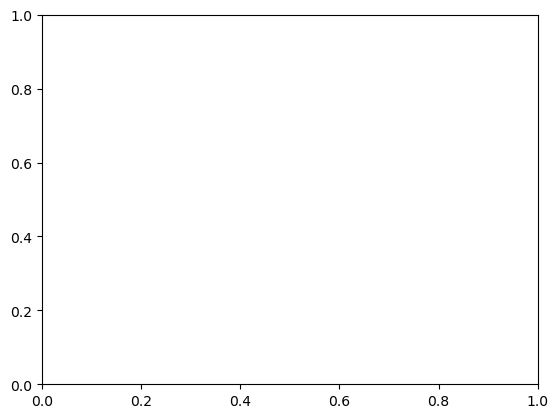

In [349]:
# Create a scatter plot between two features
plt.scatter(obs['relative_humidity_1000hPa:p'], train['pv_measurement'])
plt.xlabel('relative_humidity_1000hPa:p')
plt.ylabel('pv_measurement')
plt.title('Scatter Plot between Feature 1 and Feature 2')
plt.show()